<a href="https://colab.research.google.com/github/Comicboy/temalabor/blob/master/Temalabor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -q "/content/gdrive/My Drive/dataset.zip"

In [0]:
data_root='dataset'

In [5]:
IMAGE_SHAPE = (256, 256)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);

dataset


In [0]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20) #20% validation data
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)


In [7]:
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="validation",shuffle=True,target_size=IMAGE_SHAPE) # Found 4088 images belonging to 20 classes.

Found 4088 images belonging to 20 classes.


In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

In [9]:
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=IMAGE_SHAPE) # Found 16393 images belonging to 20 classes.

Found 16393 images belonging to 20 classes.


In [10]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape) # Image batch shape:  (32, 256, 256, 3)
print("Label batch shape: ", label_batch_train.shape) # Label batch shape:  (32, 20)

Image batch shape:  (32, 256, 256, 3)
Label batch shape:  (32, 20)


In [11]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels) # ['Airplane' 'Bicycle' 'Bird' 'Boat' 'Bottle' 'Bus' 'Car' 'Cat' 'Chair' 'Cow' 'Dog' 'Horse' 'Motorbike' 'Person' 'Plant' 'Sheep' 'Sofa' 'Table' 'Train' 'Tv']

['Airplane' 'Bicycle' 'Bird' 'Boat' 'Bottle' 'Bus' 'Car' 'Cat' 'Chair'
 'Cow' 'Dog' 'Horse' 'Motorbike' 'Person' 'Plant' 'Sheep' 'Sofa' 'Table'
 'Train' 'Tv']


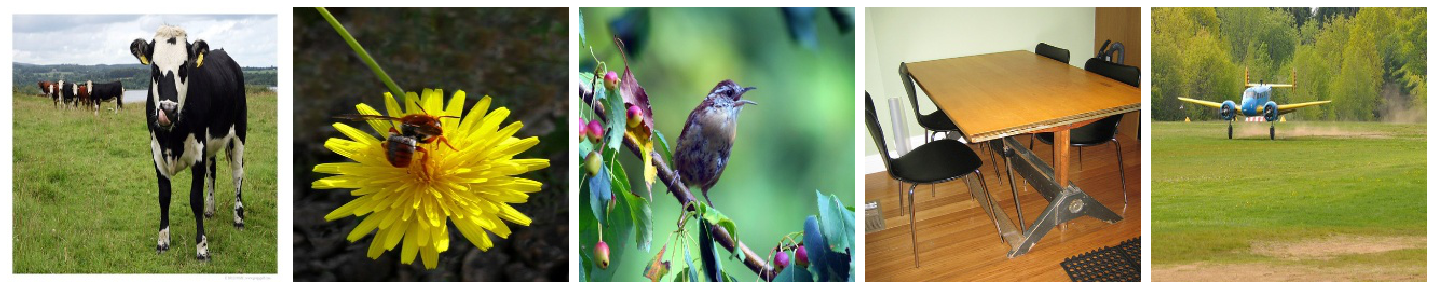

In [12]:
sample_training_images, _ = next(train_generator)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])


CNN

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

In [14]:
model = tf.keras.models.Sequential([# Először megadjuk a 12 konvolúciós hálózatot 2-esével illetve 3-asával összekapcsolva, poolingokkal elválasztva, majd a 3 rétegű fully connected hálózatot droput regularizációval
                                    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2)),

                                    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2)),

                                    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2)),

                                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2)),

                                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding = 'same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2)),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(4096, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4096, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(20, activation='softmax')

])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       2

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size) # epochonkénti lépés batch-ek alapján
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

In [18]:
history = model.fit(train_generator, epochs=10, verbose=1, steps_per_epoch=steps_per_epoch, validation_data=valid_generator, validation_steps=val_steps_per_epoch, callbacks = [callback])

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
513/513 [==============================] - 175s 341ms/step - loss: 0.1985 - acc: 0.9500 - val_loss: 0.1984 - val_acc: 0.9500
Epoch 2/10
513/513 [==============================] - 161s 314ms/step - loss: 0.1984 - acc: 0.9500 - val_loss: 0.1984 - val_acc: 0.9500
Epoch 3/10
513/513 [==============================] - 161s 314ms/step - loss: 0.1984 - acc: 0.9500 - val_loss: 0.1984 - val_acc: 0.9500
Epoch 4/10
513/513 [==============================] - 161s 314ms/step - loss: 0.1984 - acc: 0.9500 - val_loss: 0.1984 - val_acc: 0.9500
Epoch 5/10
513/513 [==============================] - 161s 314ms/step - loss: 0.1984 - acc: 0.9500 - val_loss: 0.1984 - val_acc: 0.9500
Epoch 6/10
513/513 [==============================] - 161s 314ms/step - loss: 0.1984 - acc: 0.9500 - val_loss: 0.1984 - val_acc: 0.9500
Epoch 7/10
513/513 [==============================] - 161s 314ms/step - loss: 0.1984 - acc

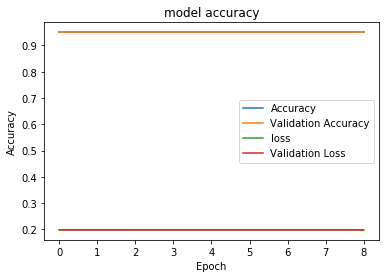

In [19]:
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()
